In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from Utils.univariate_featureSelection import featureSelectionResults
from Utils.setupDataset import get_dataset, combine_datasets
from Utils.feature_vector import get_feature_names
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics as skmetrics
from Utils.selection_metrics import SelectionMetrics

fnames = get_feature_names()

m_dev = get_dataset("Datasets/M_DEV_dataset.pickle")
w_dev = get_dataset("Datasets/W_DEV_dataset.pickle")
m_val = get_dataset("Datasets/M_VAL_dataset.pickle")
w_val = get_dataset("Datasets/W_VAL_dataset.pickle")

m_filename = 'Datasets/M_SELECTIONS_univariate.csv'
w_filename = 'Datasets/W_SELECTIONS_univariate.csv'


m_rfe = 'Datasets/M_SELECTIONS_RFE.csv'
w_rfe = 'Datasets/W_SELECTIONS_RFE.csv'


def get_stepwise_results(dev, val, rankfile, rfe_file):
    dfs = []
    for i in range(1, 69):
        results = featureSelectionResults(dev, val, rankfile, rfe_file, i)
        df = results.data_frame()
        dfs.append(df)
    return dfs

def get_stepwise_scores(dfs, scorename='f1', start=1, end=69):
    noselection = []
    RFE = []
    combined= []
    chi = []
    mi = []
    ranksum = []
    ftest = []

    for df in dfs[start:end]:
        noselection.append(df[scorename]['no selection'])
        RFE.append(df[scorename]['RFE'])
        combined.append(df[scorename]['combined'])
        ftest.append(df[scorename]['f-test'])
        ranksum.append(df[scorename]['ranksum'])
        chi.append(df[scorename]['chi2'])
        mi.append(df[scorename]['mi'])
    
    return noselection, RFE, combined, ftest, ranksum, chi, mi


def plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=0, end=68, title="my dataset", scorename='f1 score'):
    if end > len(noselection):
        end = len(noselection)
    x_axis = np.arange(start, end)

    plt.plot(x_axis,noselection[start:end], color="red", linewidth=3, linestyle="-", label="no selection")
    plt.plot(x_axis,RFE[start:end], color="green", linewidth=2, linestyle="-", label="RFE") 
    plt.plot(x_axis,ftest[start:end], color="blue", linewidth=2, linestyle="-", label="f-test") 
    plt.plot(x_axis,ranksum[start:end], color="pink", linewidth=2, linestyle="-", label="ranksum") 
    plt.plot(x_axis,chi[start:end], color="orange", linewidth=2, linestyle="-", label="chi2") 
    plt.plot(x_axis,mi[start:end], color="#98df8a", linewidth=2, linestyle="-", label="mi") 
    plt.plot(x_axis,combined[start:end], color="#aec7e8", linewidth=2, linestyle="-", label="combined") 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.suptitle(title)
    plt.xlabel('n Features')
    plt.ylabel(scorename)
    plt.show()
    


In [35]:
m_dev['target'][100:1050]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [17]:
for i in range(0,40):
    y_test = w_val['target']
    model = LogisticRegression()
    model.fit(w_dev['data'], w_dev['target'])
    y_pred = model.predict(w_val['data'])
    confusion = skmetrics.confusion_matrix(y_test, y_pred)
    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    accuracy = skmetrics.accuracy_score(y_test, y_pred)
    recall = skmetrics.recall_score(y_test,y_pred)

    precision = skmetrics.precision_score(y_test, y_pred)
    f1 = 2*precision*recall/(precision+recall)
    metrics = np.array([ f1, precision, recall, accuracy, TN, FP, FN, TP])
    print metrics


[   0.829    0.943    0.739    0.847  832.      39.     228.     647.   ]
[   0.83     0.939    0.743    0.847  829.      42.     225.     650.   ]
[   0.828    0.938    0.742    0.846  828.      43.     226.     649.   ]
[   0.83     0.938    0.744    0.847  828.      43.     224.     651.   ]
[   0.83     0.935    0.745    0.847  826.      45.     223.     652.   ]
[   0.827    0.946    0.735    0.846  834.      37.     232.     643.   ]
[   0.829    0.933    0.746    0.846  824.      47.     222.     653.   ]
[   0.83     0.936    0.746    0.847  826.      45.     222.     653.   ]
[   0.827    0.944    0.736    0.846  833.      38.     231.     644.   ]
[   0.829    0.946    0.737    0.847  834.      37.     230.     645.   ]
[   0.83     0.935    0.745    0.847  826.      45.     223.     652.   ]
[   0.828    0.939    0.741    0.846  829.      42.     227.     648.   ]
[   0.829    0.954    0.734    0.849  840.      31.     233.     642.   ]
[   0.83     0.943    0.741    0.848  

# my dataset

In [2]:
dfs = get_stepwise_results(m_dev, m_val, m_filename, m_rfe)


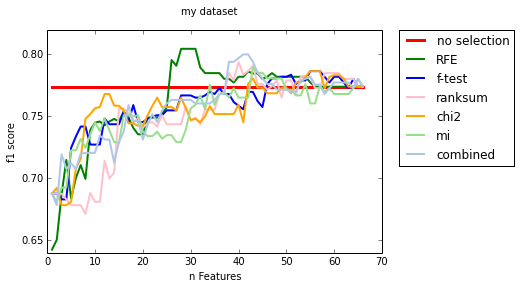

In [3]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

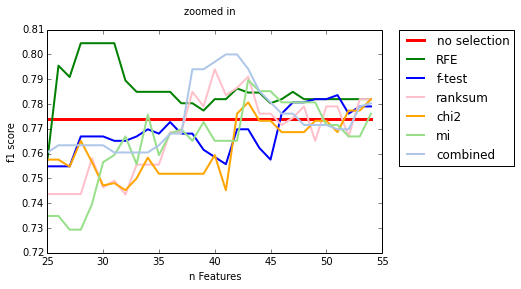

In [4]:
# ZOOOOM
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=25, end=55, title="zoomed in")

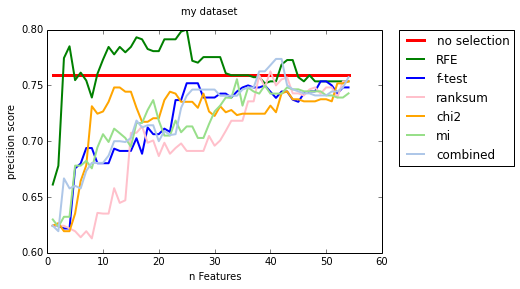

In [5]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='precision')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=55, scorename='precision score')

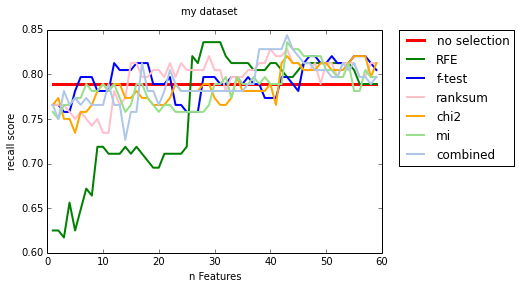

In [6]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')

# wiki dataset

In [7]:
w_dfs = get_stepwise_results(w_dev, w_val, w_filename, w_rfe)

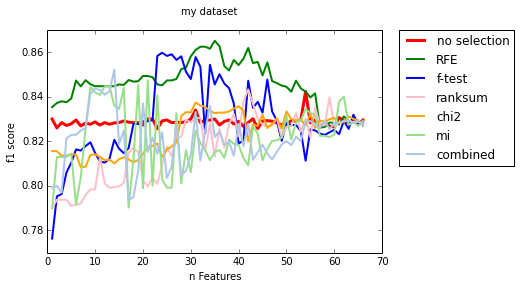

In [8]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

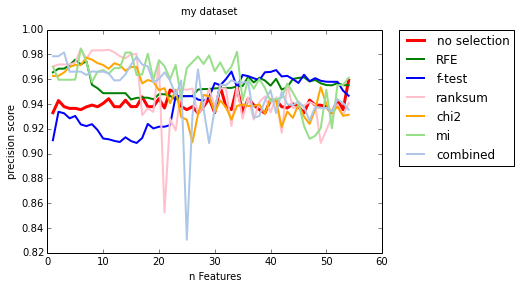

In [9]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='precision')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=55, scorename='precision score')

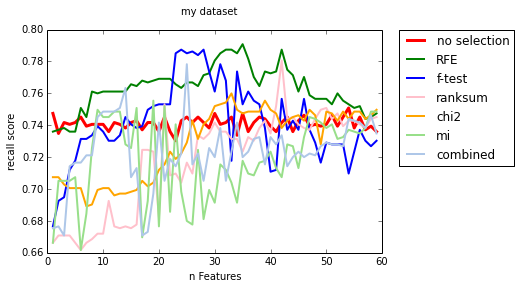

In [10]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')